<h1> Entrenando un algoritmo de Machine Learning </h1>

<p> Implementar un modelo de regresión logística para abordar el problema de detección de spam tiene varios beneficios clave:
<li> Interpretabilidad.
<li> Eficiencia
<li> Probabilidad de clasificación 
<li> Facilidad de implementación
<li> Base para modelos más complejos
<p> la implementación de un modelo de regresión logística para la detección de spam puede ofrecer una combinación de interpretabilidad, eficiencia y facilidad de implementación, lo que lo convierte en una opción sólida para abordar este problema común en el campo de la ciencia de datos y el aprendizaje automático.

<p> TfidVectorizer => Transforma una colección de documentos de texto en una representación numerica con la que el algoritmo puede tener un mejor Performance. 
<p> Convierta una colección de documentos sin procesar en una matriz de funciones TF-IDF.
<h4> Documentación </h4>
<p> Enlace: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
<p> Enlace: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [18]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
df = pd.read_csv('C:/Users/chech/PC Febrero 2023/Platzi - Machine Learning/LogisticReg/data/mail_data.csv')

In [4]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<p> Los valores nulos en df se conservan en data, mientras que los valores no nulos se mantienen sin cambios.

In [5]:
data = df.where((pd.notnull(df)))

In [7]:
data.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
data.shape

(5572, 2)

<p> Transformar los datos de la columna "Category" a valores voleanos

In [9]:
data.loc[data['Category'] == 'spam','Category',] = 0
data.loc[data['Category'] == 'ham','Category',] = 1

<p> Asignación de Features y Target

In [10]:
X = data['Message']

y = data['Category']

In [11]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [12]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

<h2> EDA: </h2>
<p> A continuación validamos el porcentaje de correos en el set de datos que son SPAM o HAM (no spam). La mayor parte de los correos no son spam.

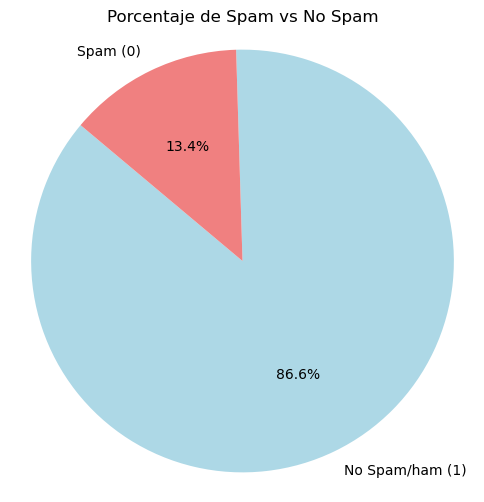

In [15]:
category_counts = data['Category'].value_counts()
percentages = [(count / len(data)) * 100 for count in category_counts]

# Etiquetas para los valores 1 y 0
labels = ['No Spam/ham (1)', 'Spam (0)']

colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.title('Porcentaje de Spam vs No Spam')
plt.axis('equal')
plt.show()

In [20]:
mailSpam = data[data['Category'] == 0]
mailSpam.head()

,Category,Message
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
5,0,FreeMsg Hey there darling it's been 3 week's n...
8,0,WINNER!! As a valued network customer you have...
9,0,Had your mobile 11 months or more? U R entitle...
11,0,"SIX chances to win CASH! From 100 to 20,000 po..."


<p> Para que el usuario tenga una idea de cuales son las palabras más repetidas en los correos clasificados como spam, realizamos la siguiente clasificación, la cual se toma solo de los correos SPAM.

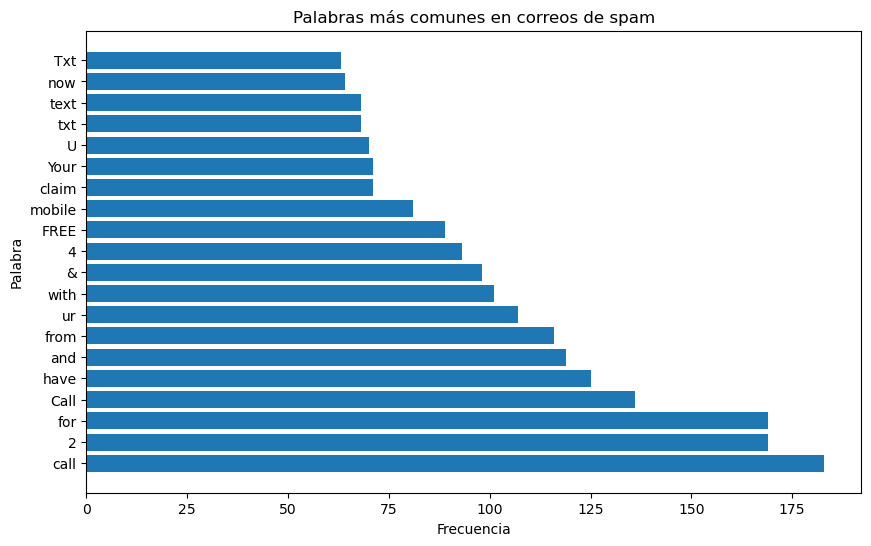

In [27]:
# Lista de palabras a excluir
palabras_excluidas = ['to', 'a', 'your', 'or', 'the', 'is', 'of', 'To', 'are', 'our', 'You', 'you', 'on']

all_words = []

# Recorrer la columna 'Message' y extraer las palabras
for message in mailSpam['Message']:
    words = message.split()  # Dividir el mensaje en palabras
    all_words.extend([word for word in words if word not in palabras_excluidas])  # Agregar palabras excluyendo las especificadas

word_counter = Counter(all_words)
modaSpam = [word for word, count in word_counter.most_common(20)]

plt.figure(figsize=(10, 6))
plt.barh(range(len(modaSpam)), [word_counter[word] for word in modaSpam], align='center')
plt.yticks(range(len(modaSpam)), modaSpam)
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Palabras más comunes en correos de spam')
plt.show()

<P> División del conjunto de datos en Test y Train.

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=3)

<h4> Estructura de Feature y Target </h4>

In [30]:
# Feature
print('El conjunto de datos TOTAL es: ', X.shape)
print('El conjunto de datos de ENTRENAMIENTO es: ' ,X_train.shape)
print('El conjunto de datos de TEST es: ' ,X_test.shape)

El conjunto de datos TOTAL es:  (5572,)
El conjunto de datos de ENTRENAMIENTO es:  (4457,)
El conjunto de datos de TEST es:  (1115,)


In [31]:
# Target
print('El conjunto de datos TOTAL es: ', y.shape)
print('El conjunto de datos de ENTRENAMIENTO es: ' ,Y_train.shape)
print('El conjunto de datos de TEST es: ' ,Y_test.shape)

El conjunto de datos TOTAL es:  (5572,)
El conjunto de datos de ENTRENAMIENTO es:  (4457,)
El conjunto de datos de TEST es:  (1115,)


<p> A continuación se crea una instancia de la clase TfidfVectorizer del módulo sklearn.feature_extraction.text en scikit-learn (una biblioteca popular de aprendizaje automático en Python). Esta clase se utiliza para convertir una colección de documentos de texto en una matriz numérica que representa la frecuencia inversa de los términos (TF-IDF) de cada palabra en los documentos.
<li> min_df => Especifica el recuento mínimo de documentos en los que debe aparecer un término para que se considere en el cálculo del TF-IDF. En este caso, se establece en 1, lo que significa que se incluirán todas las palabras que aparezcan en al menos un documento.
<li> stop_words => Especifica las palabras comunes que se deben ignorar en el cálculo del TF-IDF. En este caso, se establece en 'english', lo que utiliza una lista predeterminada de palabras en inglés comunes que no se tendrán en cuenta.
<li> lowercase => Especifica si se debe convertir el texto a minúsculas antes de calcular el TF-IDF. En este caso, se establece en True, lo que indica que se deben convertir todas las letras a minúsculas antes del procesamiento.

In [32]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [33]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [34]:
print(X_test_features)

  (0, 7271)	0.1940327008179069
  (0, 6920)	0.20571591693537986
  (0, 5373)	0.2365698724638063
  (0, 5213)	0.1988547357502182
  (0, 4386)	0.18353336340308998
  (0, 1549)	0.2646498848307188
  (0, 1405)	0.3176863938914351
  (0, 1361)	0.25132445289897426
  (0, 1082)	0.2451068436245027
  (0, 1041)	0.28016206931555726
  (0, 405)	0.2381316303003606
  (0, 306)	0.23975986557206702
  (0, 20)	0.30668032384591537
  (0, 14)	0.26797874471323896
  (0, 9)	0.2852706805264544
  (0, 1)	0.2381316303003606
  (1, 7368)	0.29957800964520975
  (1, 6732)	0.42473488678029325
  (1, 6588)	0.3298937975962767
  (1, 6507)	0.26731535902873493
  (1, 6214)	0.3621564482127515
  (1, 4729)	0.22965776503163893
  (1, 4418)	0.3457696891316818
  (1, 3491)	0.496093956101028
  (2, 7205)	0.22341717215670331
  :	:
  (1110, 3167)	0.5718357066163949
  (1111, 7353)	0.4991205841293424
  (1111, 6787)	0.40050175714278885
  (1111, 6033)	0.4714849709283488
  (1111, 3227)	0.44384935772735523
  (1111, 2440)	0.4137350055985486
  (1112, 7071)

<h3> Entrenamiento del modelo </h3>

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train_features, Y_train)

LogisticRegression()

<p> Realizando la predicción y evaluación del modelo

In [37]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [38]:
print('Accuracy on TRAINING data: ', (accuracy_on_training_data).round(3))

Accuracy on TRAINING data:  0.967


<h3> Entrenamiento de los datos de TEST del modelo </h3>

In [39]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [40]:
print('Accuracy on TEST data: ', (accuracy_on_test_data).round(3))

Accuracy on TEST data:  0.966


<h3> Evaluación manual del modelo </h3>

In [43]:
#input_your_mail = ["GENT! We are trying to contact you. Last weekends draw shows that you won a Â£1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm]
#input_your_mail = ["Got c... I lazy to type... I forgot Ã¼ in lect... I saw a pouch but like not v nice..."]
input_your_mail =  ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

input_data_features = feature_extraction.transform(input_your_mail)

prediction = model.predict(input_data_features)

print(prediction)

if (prediction[0] == 1):
    print("Este E-mail tiene una probabilidad del 97% de NO ser SPAM.")
else:
    print("Este E-mail tiene una probabilidad del 97% de SI ser SPAM")    

[0]
Este E-mail tiene una probabilidad del 97% de SI ser SPAM
